In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
arylation_df = pd.read_csv("datasets/arylation/experiment_index.csv", index_col="entry")
ligand_df = pd.read_csv("datasets/arylation/ligand-boltzmann_dft.csv")
ligand_smiles = list(arylation_df["Ligand_SMILES"].unique())
ligands = [ligand_df[ligand_df["ligand_SMILES"]==x]["ligand_file_name"].values[0] for x in ligand_smiles]
bases = list(arylation_df["Base_SMILES"].unique())
solvents = list(arylation_df["Solvent_SMILES"].unique())
conc_vals = [0.100, 0.057, 0.153]
temp_vals = [90,105,120]

In [13]:
ligand_prices = pd.read_excel("datasets/arylation/ligand_prices.xlsx", index_col="ligand_file_name").to_dict()["price_per_g"]
print(ligand_prices)

{'BrettPhos': 177.0, 'CgMe-PPh': 228.0, 'GorlosPhos': 500.0, 'JackiePhos': 408.0, 'PCy3': 7.4, 'P(fur)3': 82.0, 'PPh2Me': 31.0, 'PPh3': 1.4, 'PPhMe2': 28.6, 'PPhtBu2': 71.0, 'tBPh-CPhos': 468.0, 'X-Phos': 32.8}


In [14]:
for i, (ligand, smiles) in enumerate(zip(ligands, ligand_smiles)) :
    print(f"Average yield of {ligand}: {round(arylation_df[arylation_df['Ligand_SMILES']==smiles]['yield'].mean(), 1)} // {ligand_prices[ligand]}")

Average yield of BrettPhos: 25.6 // 177.0
Average yield of PPhtBu2: 0.4 // 71.0
Average yield of tBPh-CPhos: 16.5 // 468.0
Average yield of PCy3: 3.8 // 7.4
Average yield of PPh3: 16.6 // 1.4
Average yield of X-Phos: 52.8 // 32.8
Average yield of P(fur)3: 27.3 // 82.0
Average yield of PPh2Me: 2.0 // 31.0
Average yield of GorlosPhos: 19.2 // 500.0
Average yield of JackiePhos: 17.7 // 408.0
Average yield of CgMe-PPh: 50.2 // 228.0
Average yield of PPhMe2: 0.3 // 28.6


In [32]:
from evaluate_complete_deoxy import *
for conc in conc_vals :
    for temp in temp_vals :
        sub_df = arylation_df[
            (arylation_df["Temp_C"]==temp) &\
            (arylation_df["Concentration"]==conc)
        ]
        yield_vals = sub_df.pivot_table(values="yield", index="Ligand_SMILES", columns=["Base_SMILES", "Solvent_SMILES"])
        new = yield_to_ranking(yield_vals.to_numpy())
        print(yield_vals.to_numpy())
        print(new)
        print()
        print()
        # print(len(np.unique(new, axis=0)))

[[ 0.    0.    0.    0.    0.    0.    0.95  0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.   19.39 48.64 23.75  0.   38.12 39.5  30.95  4.23 42.45 48.21 29.21
   5.22 17.92  9.66 20.73]
 [22.94 36.98 69.11  3.   55.17 26.33 45.95 42.3  84.17 59.27 86.37 85.24
  38.03 25.5  26.5  28.11]
 [13.78  2.99 24.25  8.88 10.34  4.73  0.    8.16  6.93  3.17 18.59  2.67
   4.85  0.7   3.89  0.79]
 [ 4.77 31.97  5.29  0.   10.12 23.22  6.69  0.   17.74 20.04  6.27  0.
  47.03  7.34  4.61  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   1.06  0.    0.    0.  ]
 [75.28  8.21 37.4  17.93 55.7  18.9  57.18 21.51 39.55 23.05 57.95 24.59
  13.19 11.95 16.04 14.83]
 [ 1.26  7.8  13.01  2.21  3.51  8.98  0.    0.   16.92  5.5  32.14  2.69
  45.87  4.95 19.97  4.43]
 [33.59  0.    1.9   0.26 38.78  0.32  2.48  0.65 32.36  5.91  5.8   1.9
  14.29  0.55  2.83  1.19]

<Axes: >

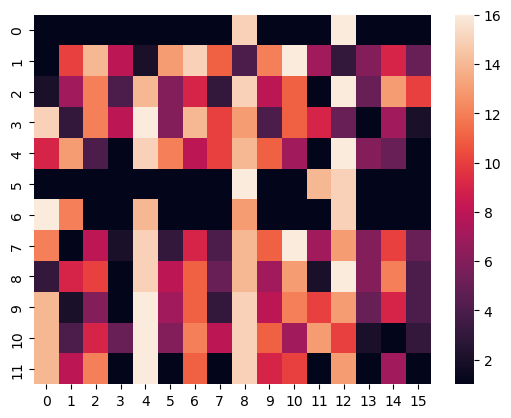

In [38]:
sns.heatmap(17-new)

In [49]:
from itertools import product
for i, (ligand, smiles) in enumerate(zip(ligands, ligand_smiles)) :
    sub_df = arylation_df[arylation_df["Ligand_SMILES"] == smiles]
    for conc, temp in product(conc_vals, temp_vals):
        y_vals = sub_df[(sub_df["Temp_C"]==temp) & (sub_df["Concentration"]==conc)]["yield"].to_numpy()
        print(ligand, conc,"M,", temp,"C,", sum(y_vals<10))
    print()

BrettPhos 0.1 M, 90 C, 5
BrettPhos 0.1 M, 105 C, 4
BrettPhos 0.1 M, 120 C, 4
BrettPhos 0.057 M, 90 C, 5
BrettPhos 0.057 M, 105 C, 5
BrettPhos 0.057 M, 120 C, 5
BrettPhos 0.153 M, 90 C, 4
BrettPhos 0.153 M, 105 C, 4
BrettPhos 0.153 M, 120 C, 4

PPhtBu2 0.1 M, 90 C, 16
PPhtBu2 0.1 M, 105 C, 16
PPhtBu2 0.1 M, 120 C, 14
PPhtBu2 0.057 M, 90 C, 16
PPhtBu2 0.057 M, 105 C, 16
PPhtBu2 0.057 M, 120 C, 16
PPhtBu2 0.153 M, 90 C, 16
PPhtBu2 0.153 M, 105 C, 16
PPhtBu2 0.153 M, 120 C, 16

tBPh-CPhos 0.1 M, 90 C, 10
tBPh-CPhos 0.1 M, 105 C, 8
tBPh-CPhos 0.1 M, 120 C, 8
tBPh-CPhos 0.057 M, 90 C, 8
tBPh-CPhos 0.057 M, 105 C, 7
tBPh-CPhos 0.057 M, 120 C, 9
tBPh-CPhos 0.153 M, 90 C, 10
tBPh-CPhos 0.153 M, 105 C, 9
tBPh-CPhos 0.153 M, 120 C, 9

PCy3 0.1 M, 90 C, 16
PCy3 0.1 M, 105 C, 14
PCy3 0.1 M, 120 C, 12
PCy3 0.057 M, 90 C, 16
PCy3 0.057 M, 105 C, 13
PCy3 0.057 M, 120 C, 12
PCy3 0.153 M, 90 C, 16
PCy3 0.153 M, 105 C, 14
PCy3 0.153 M, 120 C, 12

PPh3 0.1 M, 90 C, 12
PPh3 0.1 M, 105 C, 11
PPh3 0.1 M, 120